In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./data/mobiles_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company.Name                 925 non-null    object 
 1   Model.Name                   925 non-null    object 
 2   Mobile.Weight                925 non-null    object 
 3   RAM                          925 non-null    object 
 4   Front.Camera                 925 non-null    object 
 5   Back.Camera                  925 non-null    object 
 6   Processor                    925 non-null    object 
 7   Battery.Capacity.mAh         925 non-null    int64  
 8   Screen.Size.inches           925 non-null    float64
 9   Launched.Price.Pakistan.PKR  925 non-null    int64  
 10  Launched.Price.India.INR     925 non-null    int64  
 11  Launched.Price.China.CNY     925 non-null    int64  
 12  Launched.Price.USA.USD       925 non-null    int64  
 13  Launched.Price.Dubai

In [6]:
df['Launched.Price.Pakistan.PKR'] = df['Launched.Price.Pakistan.PKR'] * 0.0036
df['Launched.Price.India.INR'] = df['Launched.Price.India.INR'] * 0.011
df['Launched.Price.China.CNY'] = df['Launched.Price.China.CNY'] * 0.14
df['Launched.Price.Dubai.AED'] = df['Launched.Price.Dubai.AED'] *  0.27

df.rename(columns={
    'Launched.Price.Pakistan.PKR':'Launched.Price.Pakistan.USD', 
    'Launched.Price.India.INR':'Launched.Price.India.USD', 
    'Launched.Price.China.CNY':'Launched.Price.China.USD', 
    'Launched.Price.Dubai.AED':'Launched.Price.Dubai.USD'}, inplace=True)

In [7]:
# Split the RAM = 8GB / 12 GB i two rows

frame = []

for idx, row in df.iterrows():
    if '/' in row['RAM']:
        values = row['RAM'].split('/')

        copy = row.copy()
        
        copy['RAM'] = values[0]
        frame.append(copy)
        copy['RAM'] = values[1]
        frame.append(copy)
    else:
        frame.append(row.copy())

df = pd.DataFrame(frame)

In [8]:
# Make Ram into float

df['RAM.size'] = df['RAM'].apply(lambda ram: float(ram.replace('GB', '')))

In [9]:
df

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.USD,Launched.Price.India.USD,Launched.Price.China.USD,Launched.Price.USA.USD,Launched.Price.Dubai.USD,Launched.Year,RAM.size
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.10,809.9964,879.989,811.86,799,755.73,2024,6.0
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.10,845.9964,934.989,853.86,849,809.73,2024,6.0
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.10,881.9964,989.989,909.86,899,863.73,2024,6.0
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.70,899.9964,989.989,867.86,899,863.73,2024,6.0
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.70,935.9964,1044.989,909.86,949,917.73,2024,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,POCO,M7 5G 128GB,198g,6GB,8MP,50MP,MediaTek Dimensity 7025,5110,6.67,143.9964,175.989,223.86,229,242.73,2024,6.0
921,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,10000,12.10,238.3920,263.989,293.86,280,277.83,2024,8.0
922,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,10000,12.10,256.3920,285.989,321.86,300,296.73,2024,8.0
923,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400,7.60,2177.9964,1814.989,1959.86,1899,1943.73,2024,12.0


## Part 1: Analytical Questions

### Quetsion 1

Does battery capacity influence the launched price of a smartphone? Check this variability across all currencies. Is there any type of difference between behaviors?

In [96]:
price_columns = [
    "Launched.Price.Pakistan.USD",
    "Launched.Price.India.USD",
    "Launched.Price.China.USD",
    "Launched.Price.USA.USD",
    "Launched.Price.Dubai.USD"
]

colors = ["#FF5733", "#33FF57", "#337BFF", "#F333FF", "#FFBE33"]

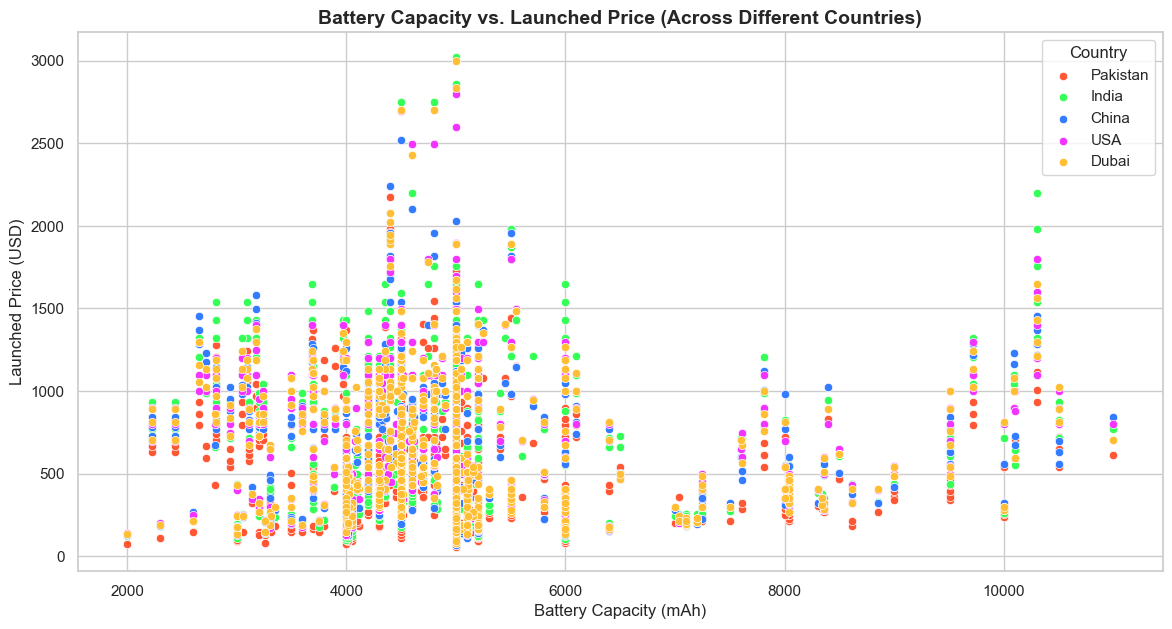

In [97]:
plt.figure(figsize=(14, 7))

for i, price_col in enumerate(price_columns):
    sns.scatterplot(data=df, x="Battery.Capacity.mAh", y=price_col, color=colors[i], label=price_col.replace('Launched.Price.', '').replace('.USD', ''))

plt.xlabel("Battery Capacity (mAh)", fontsize=12)
plt.ylabel("Launched Price (USD)", fontsize=12)
plt.title("Battery Capacity vs. Launched Price (Across Different Countries)", fontsize=14, fontweight="bold")
plt.legend(title="Country")

plt.show()

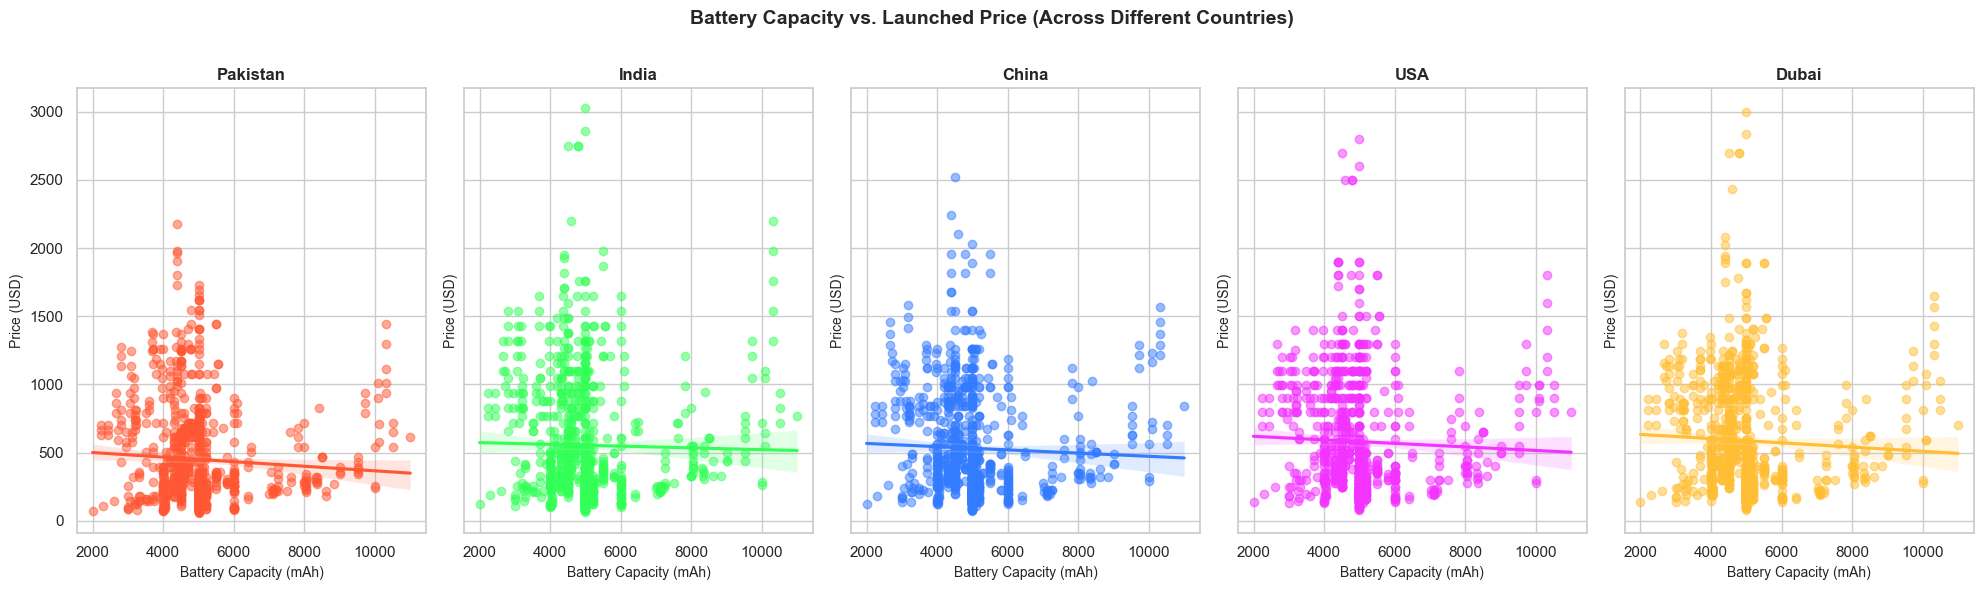

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharex=True, sharey=True)

for i, (price_col, color) in enumerate(zip(price_columns, colors)):
    sns.regplot(
        data=df, x="Battery.Capacity.mAh", y=price_col, 
        ax=axes[i], scatter_kws={'alpha':0.5, 'color': color}, line_kws={'color': color}
    )

    axes[i].set_title(price_col.replace("Launched.Price.", "").replace(".USD", ""), fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Battery Capacity (mAh)", fontsize=10)
    axes[i].set_ylabel("Price (USD)", fontsize=10)

plt.suptitle("Battery Capacity vs. Launched Price (Across Different Countries)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()

According to the plots we can conclude that the correlations between the price and battery capacity are insignificant hence hardly influence each other in general case. However it will be interesting to observe this across all the types of smartphones.

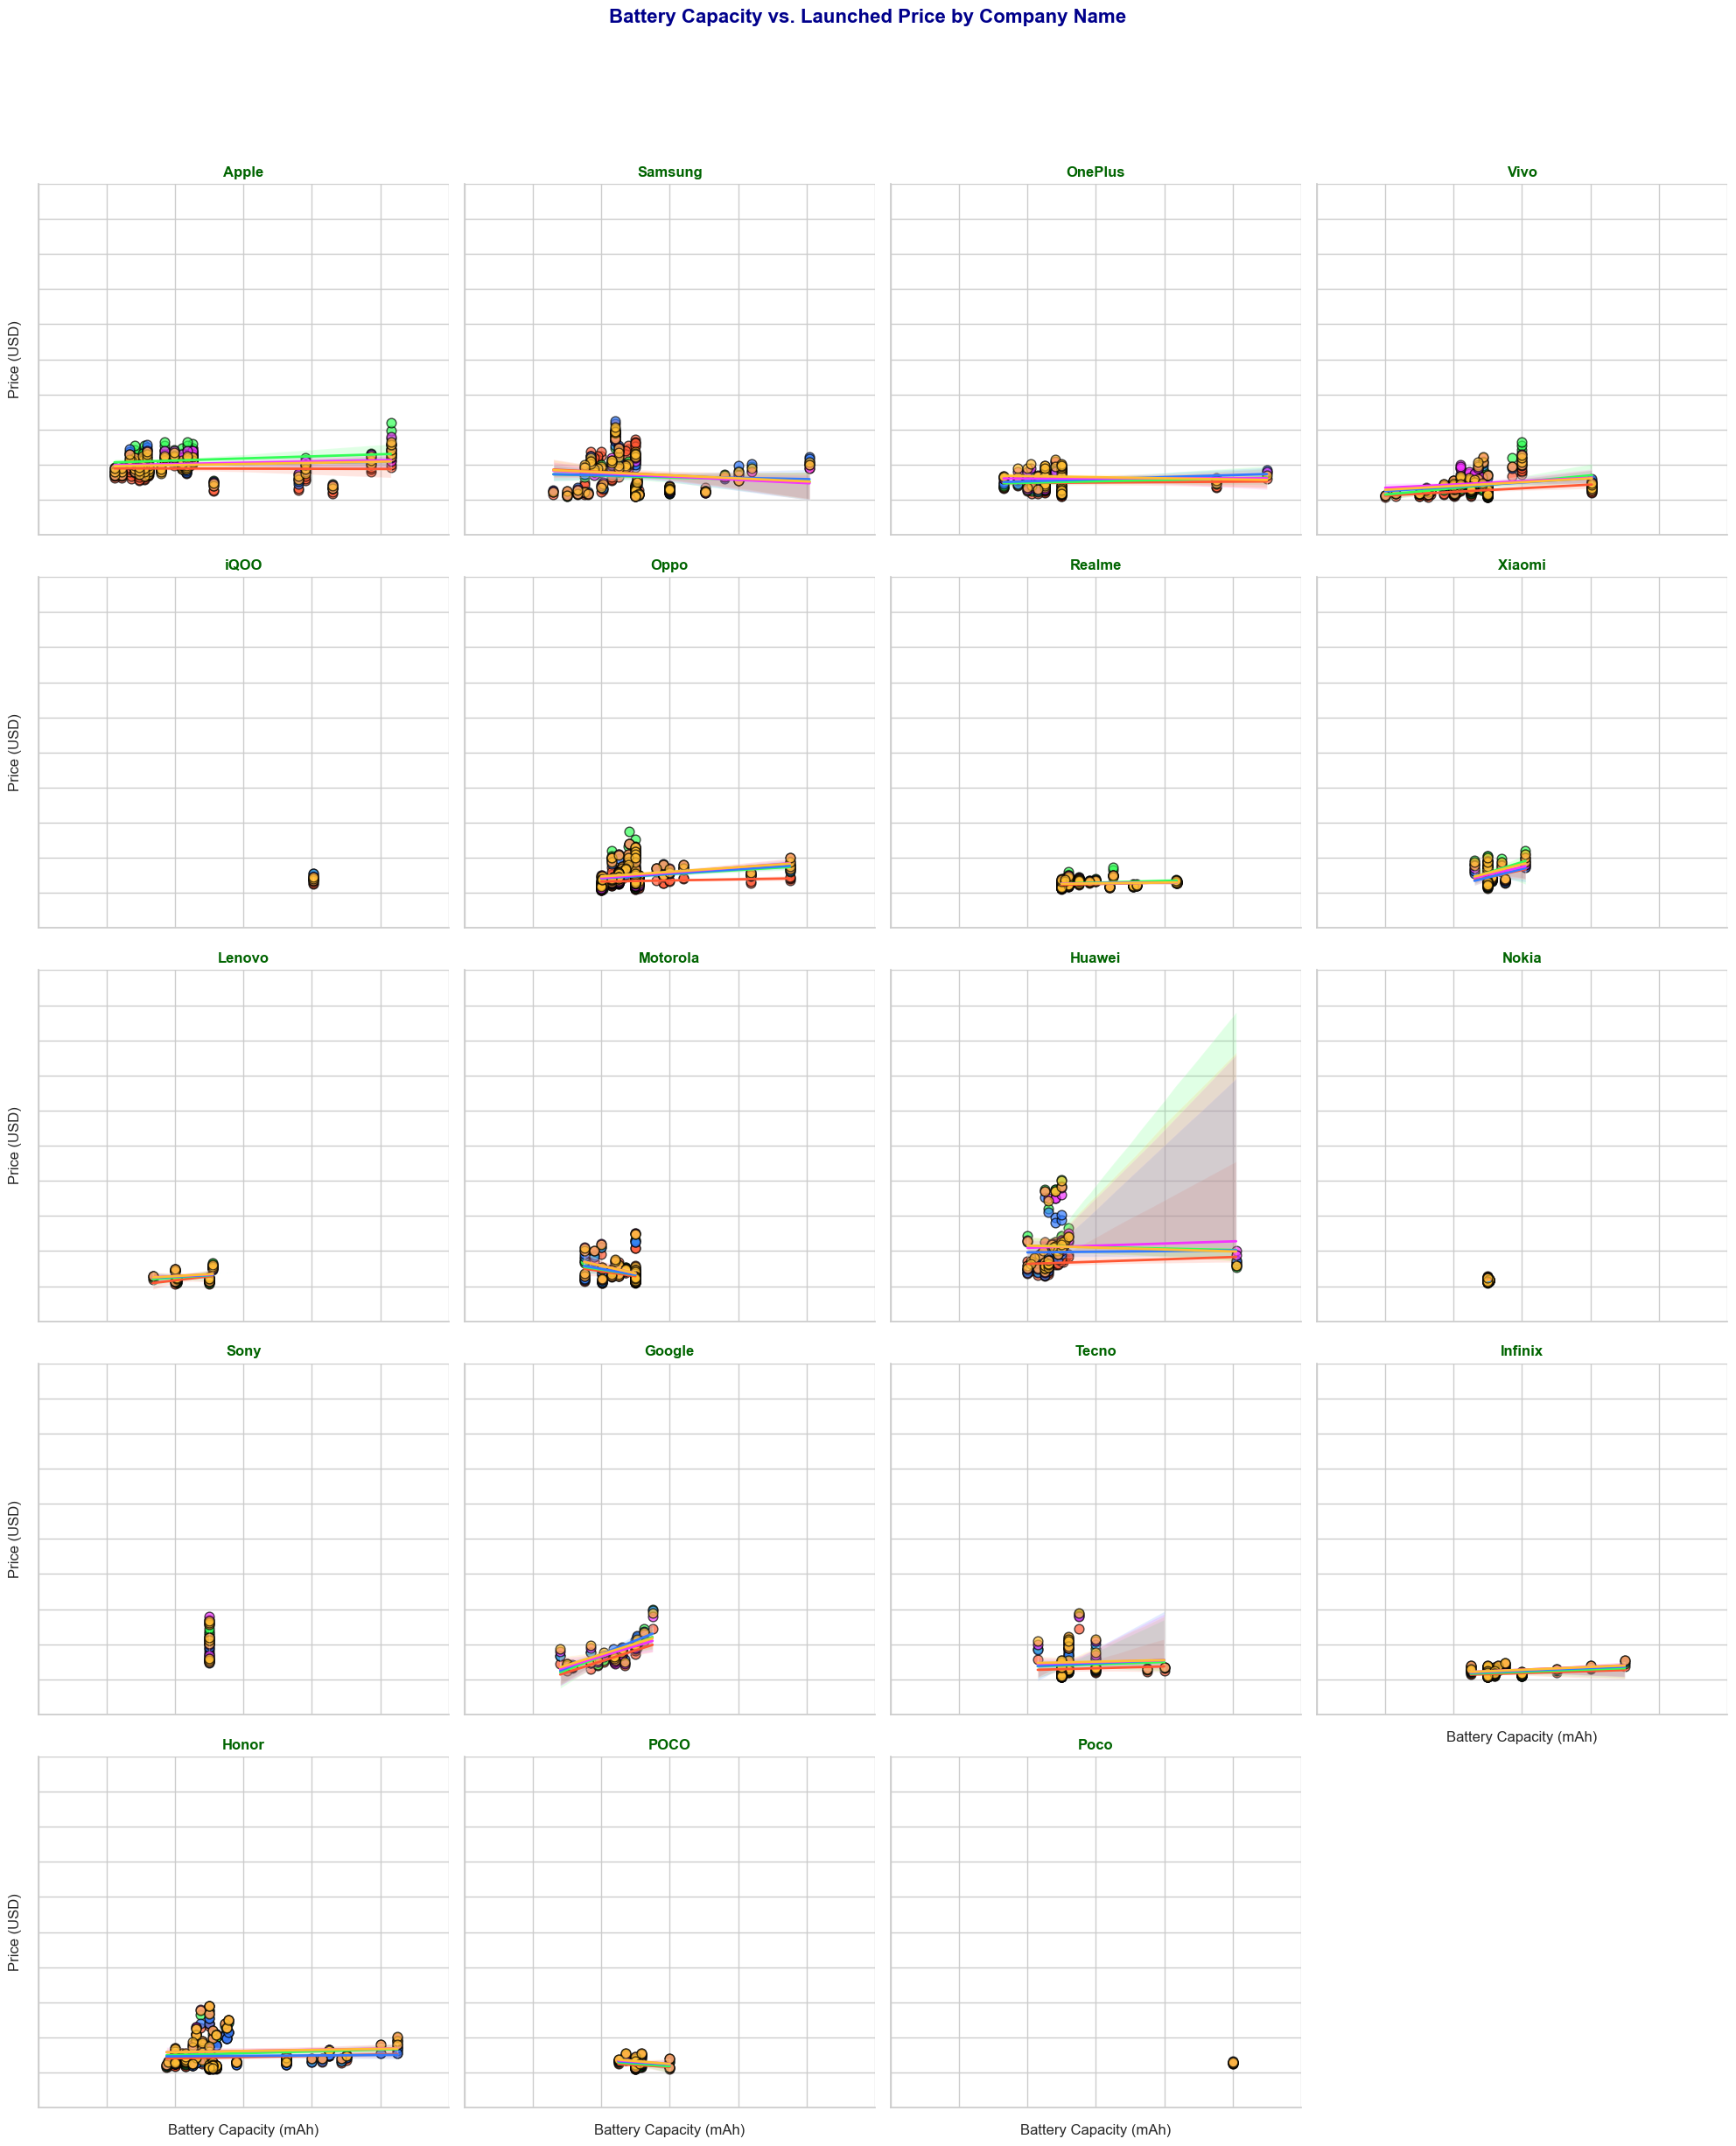

In [99]:
sns.set_theme(style="whitegrid", palette="muted")

g = sns.FacetGrid(df, col="Company.Name", col_wrap=4, height=5, sharex=True, sharey=True)

for price_col, color in zip(price_columns, colors):
    g.map(sns.regplot, "Battery.Capacity.mAh", price_col,
          scatter_kws={'alpha': 0.7, 's': 60, 'edgecolor': 'black', 'color': color},
          line_kws={'color': color, 'lw': 2})

g.fig.suptitle("Battery Capacity vs. Launched Price by Company Name", fontsize=16, fontweight="bold", color="darkblue")
g.set_axis_labels("Battery Capacity (mAh)", "Price (USD)", fontsize=12)
g.set_titles(col_template="{col_name}", fontsize=14, fontweight="bold", color="darkgreen")

g.set_xticklabels(rotation=45)
g.set_yticklabels(rotation=45)

g.tight_layout()
g.fig.subplots_adjust(top=0.9)

plt.show()

Still no correlation Therefore, we can safely assume that there is no significant influnce on price based on battary capacity.

### Question 2

Does RAM size impact the price of smartphones? Check this variability across all currencies.Is there any type of difference between behaviors?

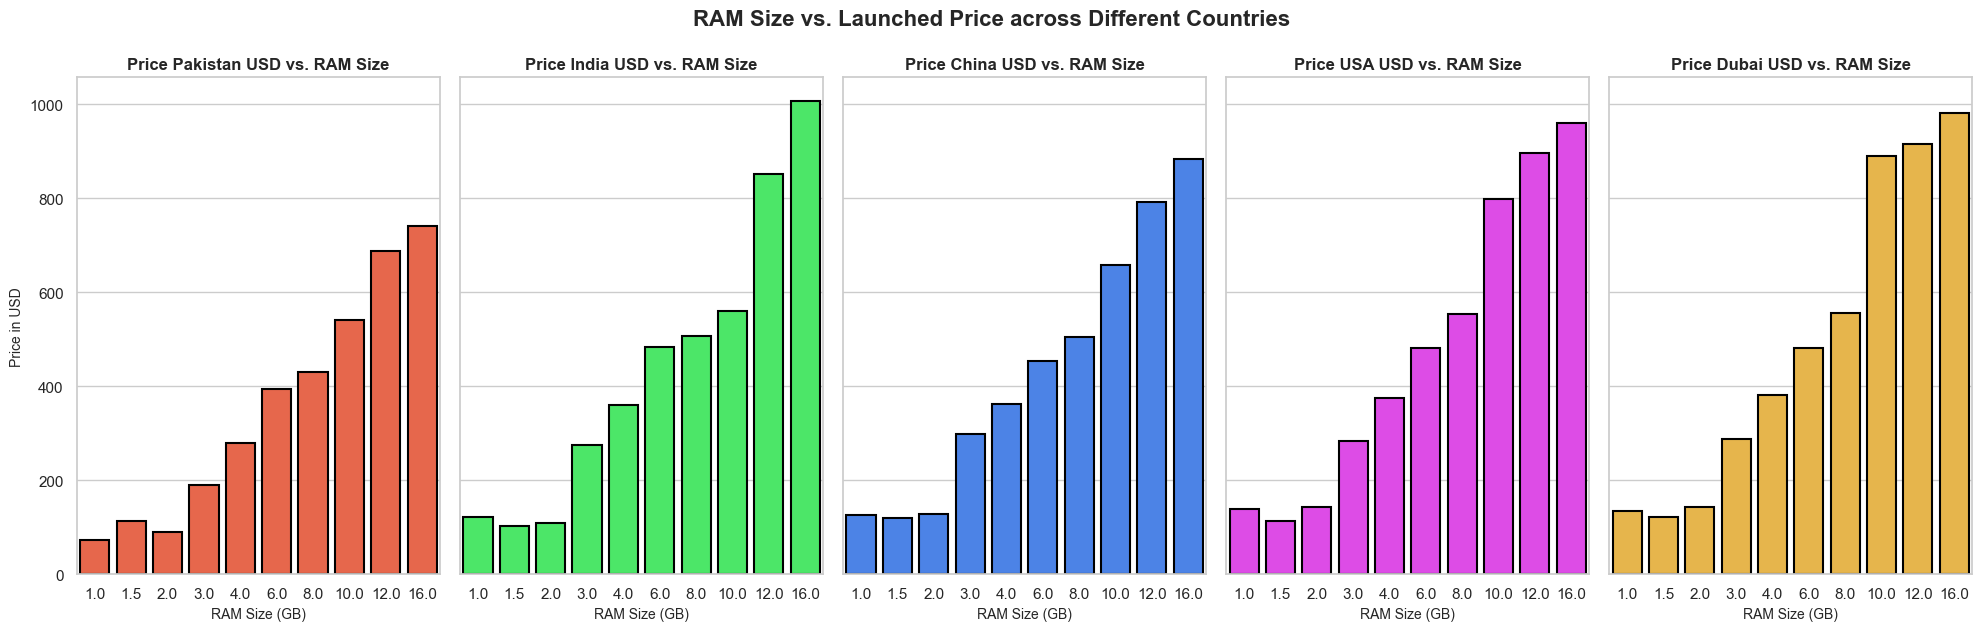

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

for i, price_col in enumerate(price_columns):
    ax = axes[i]
    sns.barplot(data=df, x='RAM.size', y=price_col, ax=ax, edgecolor='black', linewidth=1.5, errorbar=None, color=colors[i])
    
    ax.set_title(f"{price_col.replace('Launched.', '').replace('.', ' ')} vs. RAM Size", fontsize=12, fontweight='bold')
    ax.set_xlabel('RAM Size (GB)', fontsize=10)
    ax.set_ylabel(f'Price in USD', fontsize=10)

fig.tight_layout()
plt.suptitle('RAM Size vs. Launched Price across Different Countries', fontsize=16, fontweight='bold', y=1.05)
plt.show()

Here we see a clear pattern; the higher the Ram the higher the price accorss all prices.

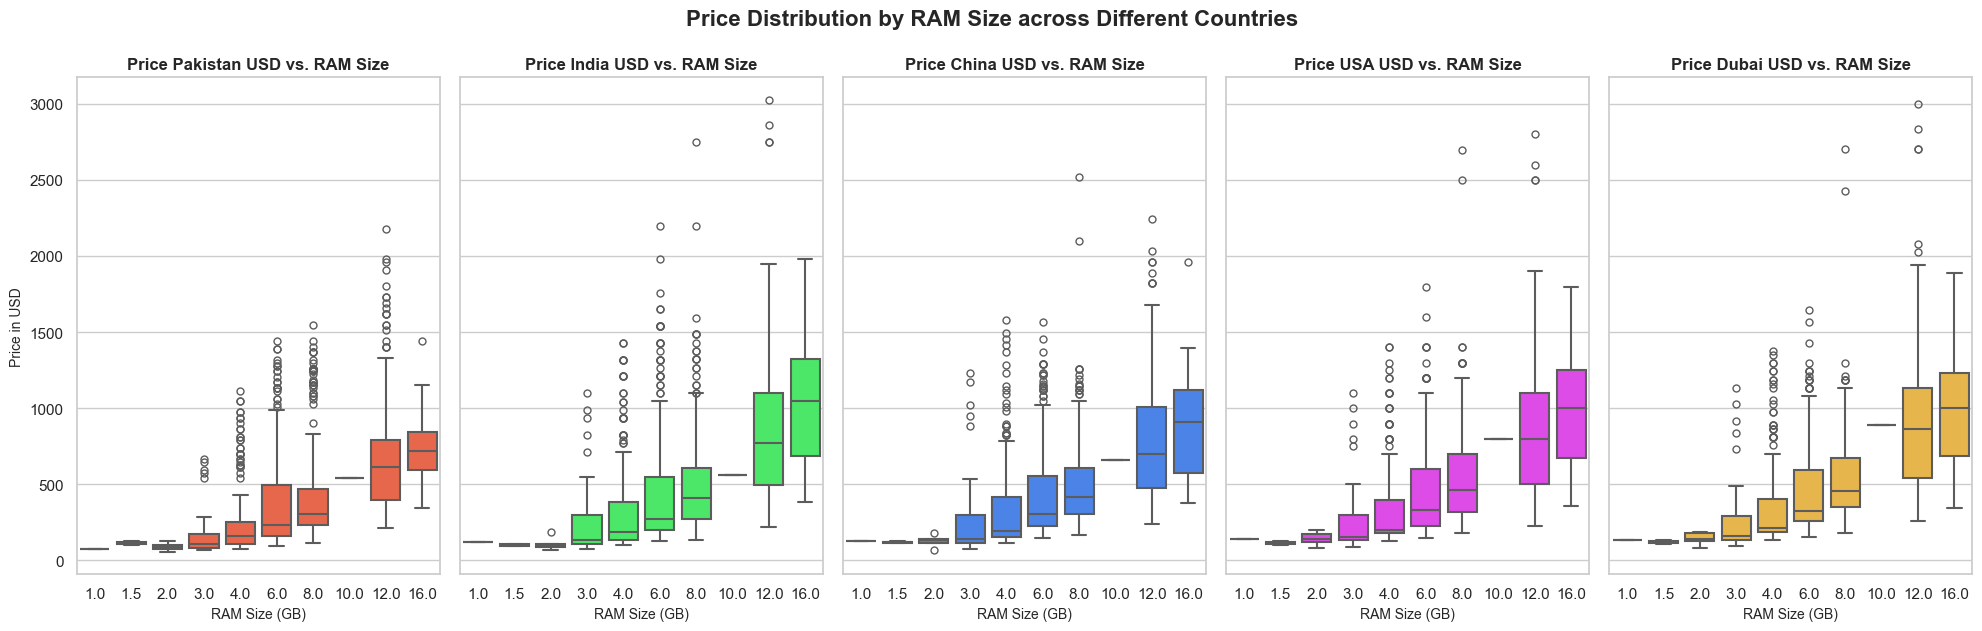

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

for i, price_col in enumerate(price_columns):
    ax = axes[i]
    sns.boxplot(data=df, x='RAM.size', y=price_col, ax=ax, color=colors[i], linewidth=1.5, fliersize=5)
    
    ax.set_title(f"{price_col.replace('Launched.', '').replace('.', ' ')} vs. RAM Size", fontsize=12, fontweight='bold')
    ax.set_xlabel('RAM Size (GB)', fontsize=10)
    ax.set_ylabel(f'Price in USD', fontsize=10)

fig.tight_layout()
plt.suptitle('Price Distribution by RAM Size across Different Countries', fontsize=16, fontweight='bold', y=1.05)
plt.show()

Here I noticed something weird with the case of 10GB but, apparently it is ok because we have only one observation with 10 GB RAM, which is logical because they do not occur taht often. Nonetheless, we can see here better that the size of the RAM is in fact positively correlated with the price of a smartphone. For our sanity check we can create a regression plot for each smartphone to be absolutely sure.

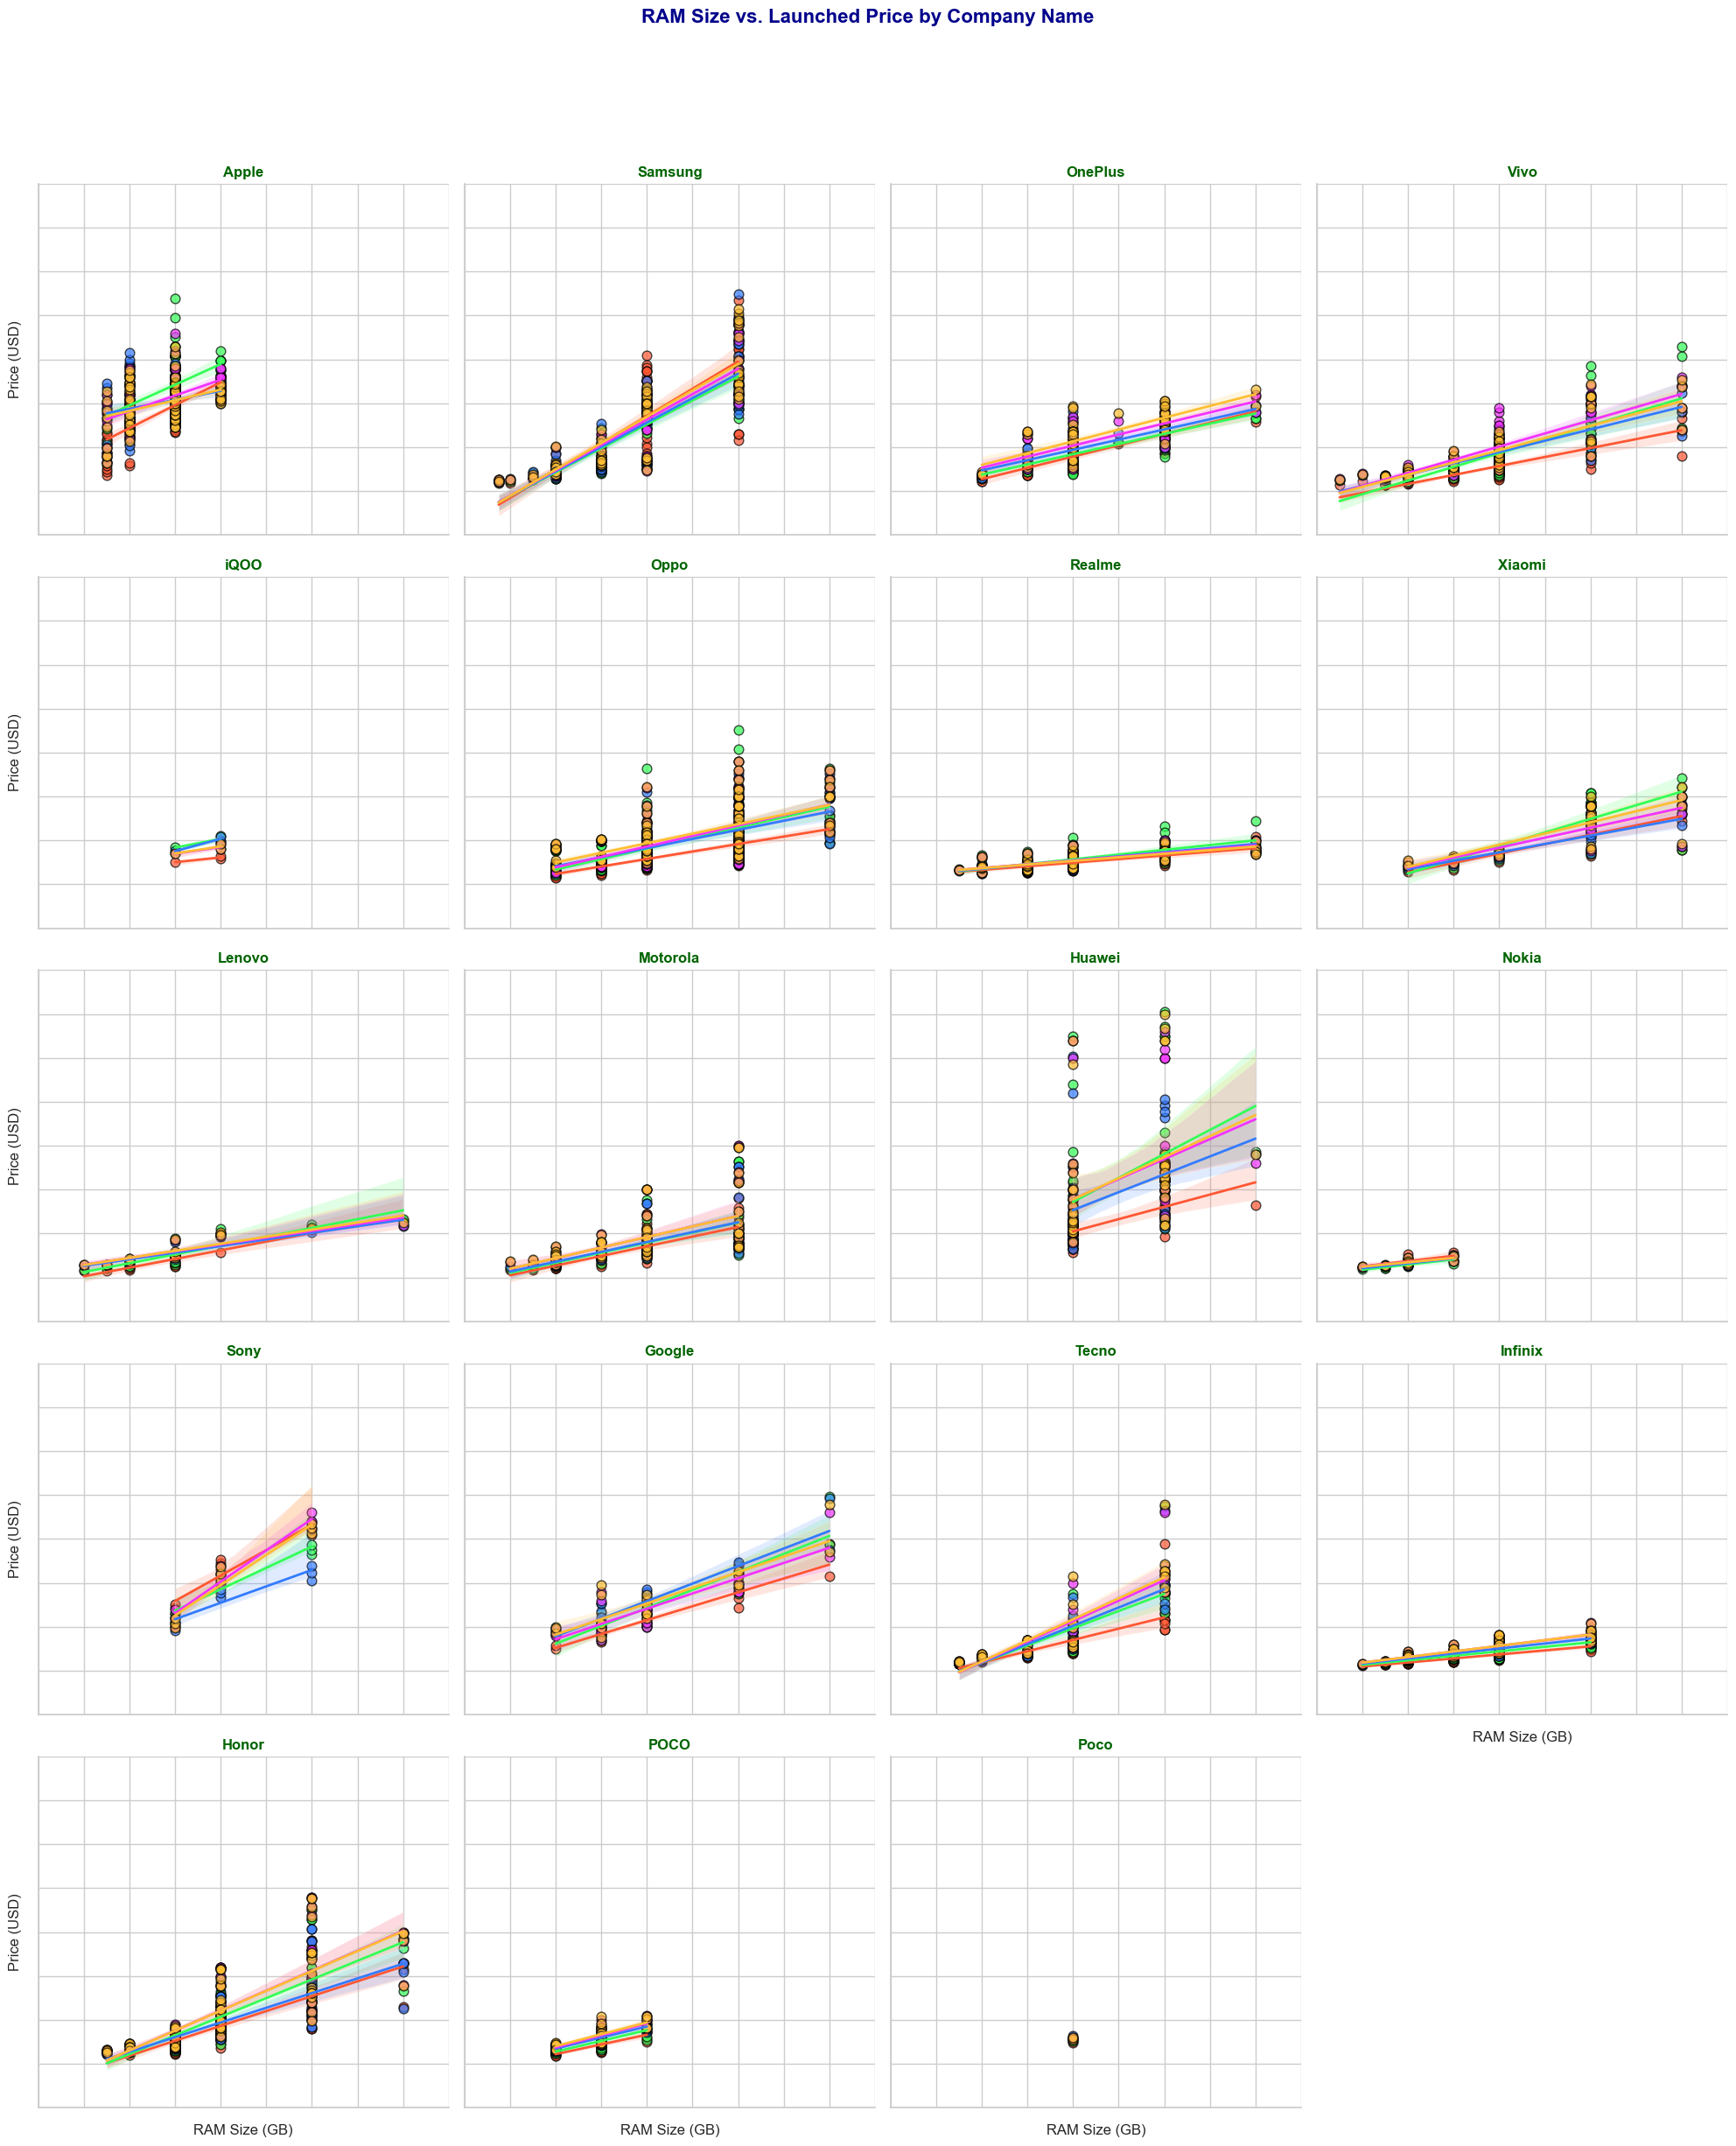

In [ ]:
sns.set_theme(style="whitegrid", palette="muted")

g = sns.FacetGrid(df, col="Company.Name", col_wrap=4, height=5, sharex=True, sharey=True)

for price_col, color in zip(price_columns, colors):
    g.map(sns.regplot, "RAM.size", price_col,
          scatter_kws={'alpha': 0.7, 's': 60, 'edgecolor': 'black', 'color': color},
          line_kws={'color': color, 'lw': 2})

g.fig.suptitle("RAM Size vs. Launched Price by Company Name", fontsize=16, fontweight="bold", color="darkblue")
g.set_axis_labels("RAM Size (GB)", "Price (USD)", fontsize=12)
g.set_titles(col_template="{col_name}", fontsize=14, fontweight="bold", color="darkgreen")

g.set_xticklabels(rotation=45)
g.set_yticklabels(rotation=45)

g.tight_layout()
g.fig.subplots_adjust(top=0.9)

plt.show()

Well for very few cases we have small correlations but manly the correlation exists.

### Question 3

Do Apple devices have a higher price variation across different regions compared to other
brands? In which country do Apple devices have the highest markup? Are there brands with
more stable pricing across regions?

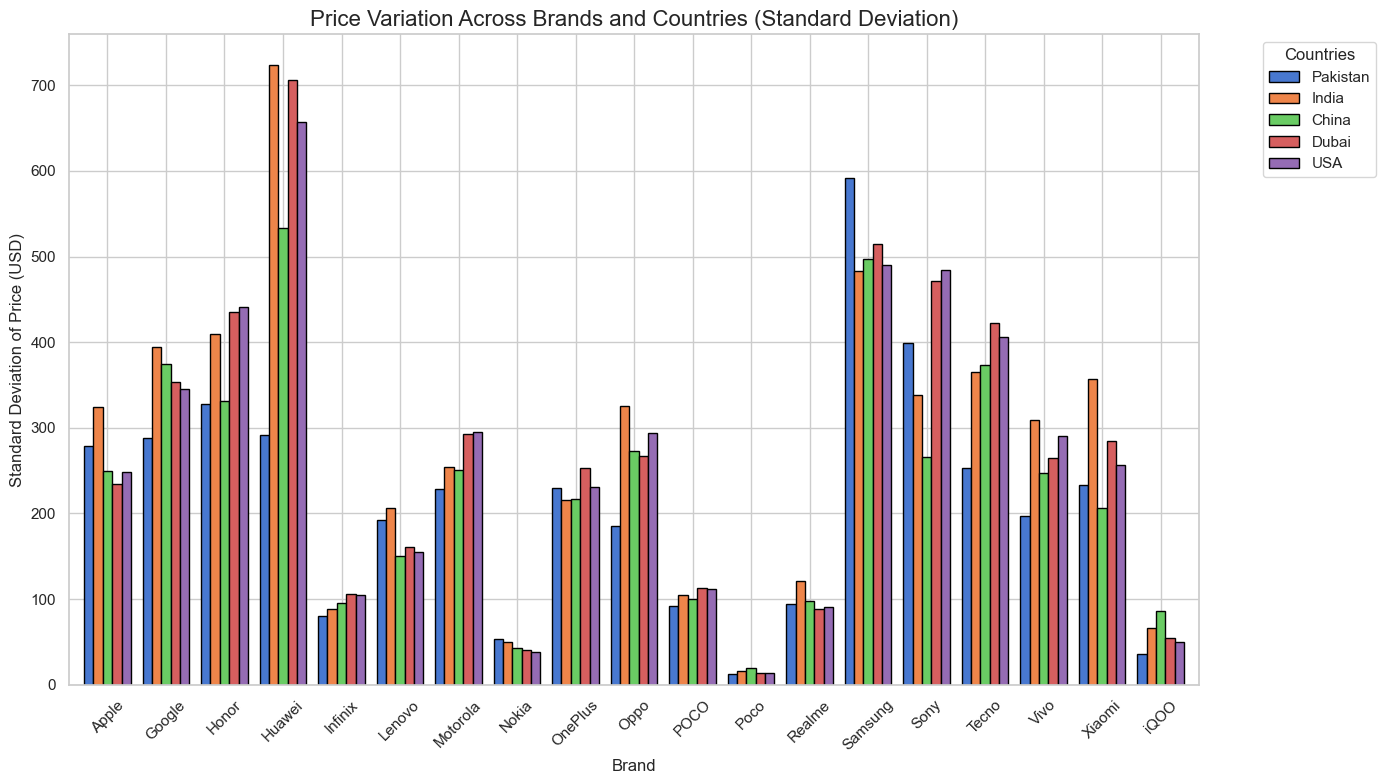

In [159]:
# Firstly let us understand the price variations per company accross different countries

std_per_brand_country = df.groupby('Company.Name')[price_columns].std()

std_per_brand_country.plot(kind='bar', figsize=(14, 8), width=0.8, edgecolor='black')

plt.title("Price Variation Across Brands and Countries (Standard Deviation)", fontsize=16)

plt.xlabel("Brand", fontsize=12)
plt.ylabel("Standard Deviation of Price (USD)", fontsize=12)

plt.xticks(rotation=45)
plt.legend(title="Countries", labels=["Pakistan", "India", "China", "Dubai", "USA"], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

I would say APPLE has a quite variability...

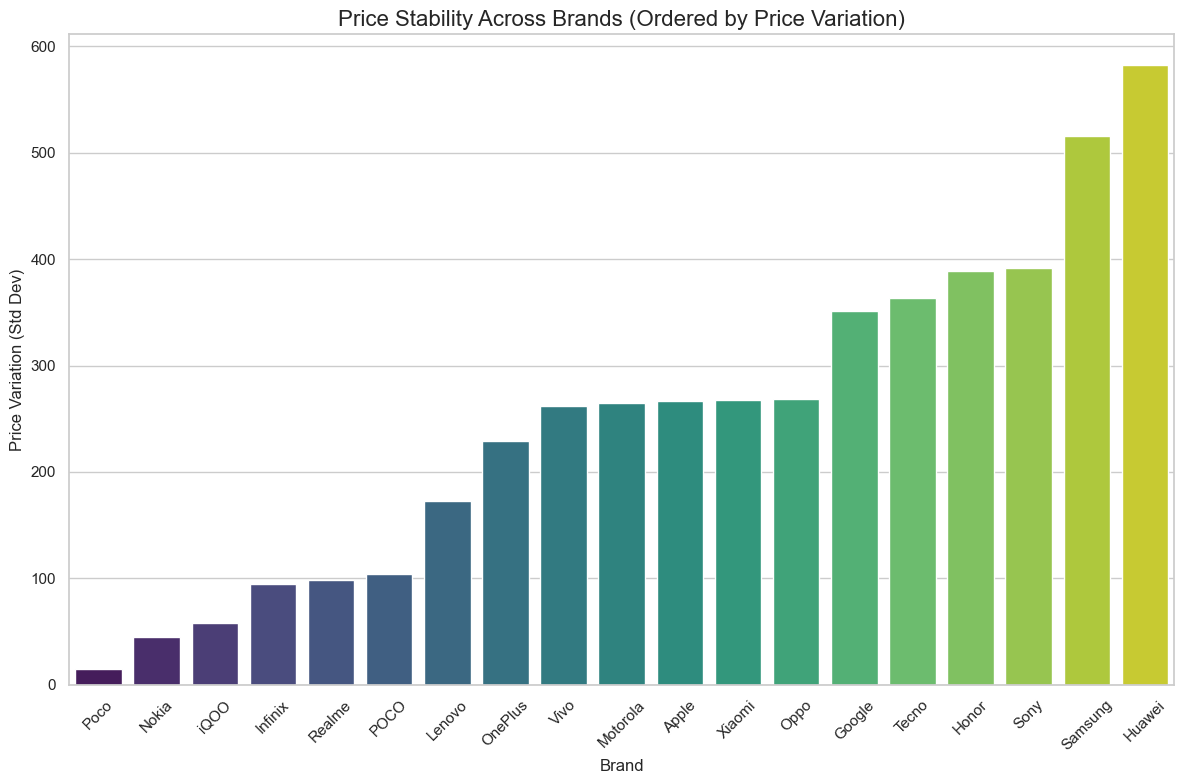

Apple has the highest markup in markup_india.


In [ ]:
# Calculate the markup for Apple devices
apple_data = df[df['Company.Name'] == 'Apple']

apple_data['markup_pakistan'] = (apple_data['Launched.Price.Pakistan.USD'] - apple_data['Launched.Price.USA.USD']) / apple_data['Launched.Price.USA.USD']
apple_data['markup_india'] = (apple_data['Launched.Price.India.USD'] - apple_data['Launched.Price.USA.USD']) / apple_data['Launched.Price.USA.USD']
apple_data['markup_china'] = (apple_data['Launched.Price.China.USD'] - apple_data['Launched.Price.USA.USD']) / apple_data['Launched.Price.USA.USD']
apple_data['markup_dubai'] = (apple_data['Launched.Price.Dubai.USD'] - apple_data['Launched.Price.USA.USD']) / apple_data['Launched.Price.USA.USD']

markup_columns = ['markup_pakistan', 'markup_india', 'markup_china', 'markup_dubai']
apple_data['highest_markup_country'] = apple_data[markup_columns].idxmax(axis=1)

price_variation = df.groupby('Company.Name')[price_columns].std()
price_variation_sorted = price_variation.mean(axis=1).sort_values()

# Plotting Price Stability (Standard Deviation) Across Brands
plt.figure(figsize=(12, 8))

sns.barplot(x=price_variation_sorted.index, y=price_variation_sorted.values, palette="viridis")

plt.title("Price Stability Across Brands (Ordered by Price Variation)", fontsize=16)

plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price Variation (Std Dev)", fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

apple_highest_markup_country = apple_data['highest_markup_country'].mode()[0]
print(f"Apple has the highest markup in {apple_highest_markup_country}.")


Well it seems the most stable is Poco, and  Apple shows lower stabilyty to my surprise. That is why I thought of looking at the number of observations and understood that it interferes with the correct interpretation of stability. Therefore let us plot the stability in a weighted manner according to the number of observations.

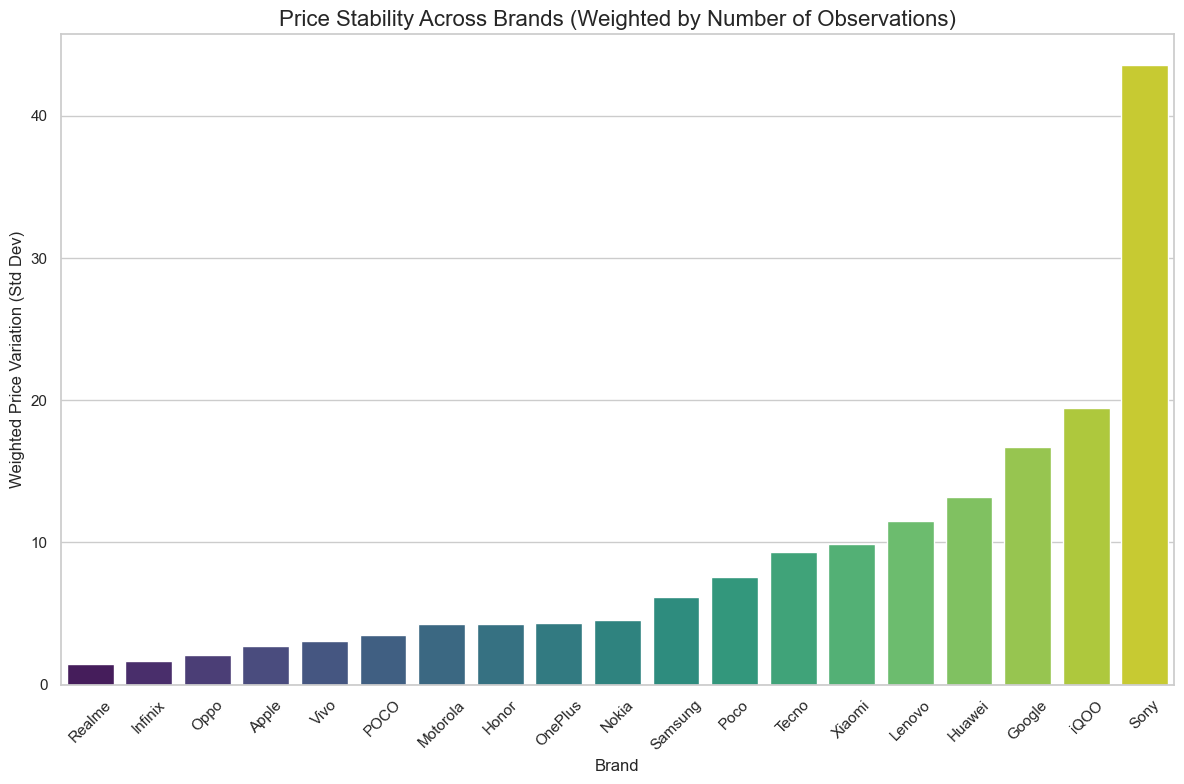

In [167]:
observations_count = df['Company.Name'].value_counts()
weighted_price_variation = price_variation.mean(axis=1) * (1 / observations_count)

plt.figure(figsize=(12, 8))

sns.barplot(x=weighted_price_variation.sort_values().index, y=weighted_price_variation_sorted.values, palette="viridis")

plt.title("Price Stability Across Brands (Weighted by Number of Observations)", fontsize=16)

plt.xlabel("Brand", fontsize=12)
plt.ylabel("Weighted Price Variation (Std Dev)", fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Well here we go... Now I see that Apple prices are pretty stable!

### Question 4

Do all smartphone brands have flagship and budget-friendly models, or do some brands
only focus on premium devices?

- Hint: Categorize brands into budget, mid-range, and premium segments 
    (Budget: < $300, Mid-range: $300 - $700, Premium: > $700). 

    Check how many models each brand has in each segment. Determine whether a brand covers all three segments or focuses only on premium/mid-range.


In [31]:
# Let us understand the category of each device by teh country prices

def categorize_device(row):
    def categorize_segment(price):
        if price < 300:
            return 'Budget'
        elif 300 <= price <= 700:
            return 'Mid-range'
        else:
            return 'Premium'
    
    segments = [
        categorize_segment(row['Launched.Price.Pakistan.USD']),
        categorize_segment(row['Launched.Price.India.USD']),
        categorize_segment(row['Launched.Price.China.USD']),
        categorize_segment(row['Launched.Price.Dubai.USD']),
        categorize_segment(row['Launched.Price.USA.USD'])
    ]
    
    return pd.Series(segments).mode()[0]

df['device_category'] = df.apply(categorize_device, axis=1)

<Figure size 1200x800 with 0 Axes>

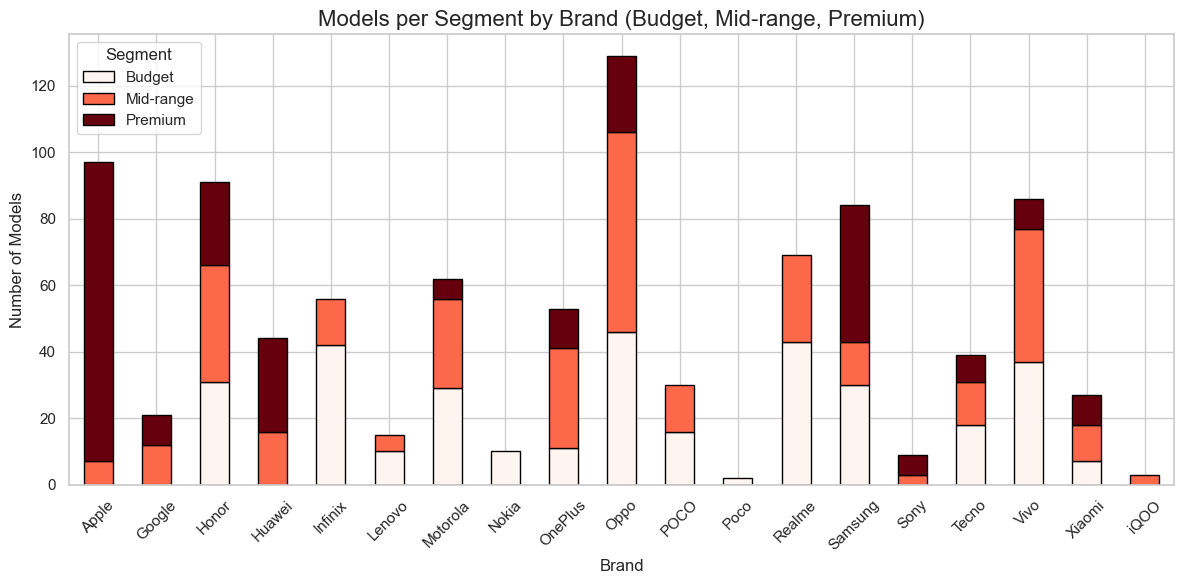

In [199]:
category_counts = df.groupby(['Company.Name', 'device_category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))

category_counts.plot(kind='bar', stacked=True, colormap='Reds', edgecolor='black', figsize=(12, 6))

plt.title("Models per Segment by Brand (Budget, Mid-range, Premium)", fontsize=16)

plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Models", fontsize=12)

plt.xticks(rotation=45)
plt.legend(title="Segment", loc='upper left', labels=['Budget', 'Mid-range', 'Premium'])

plt.tight_layout()
plt.show()

It is clearly shown which Companies focus on premium Brands; Apple, Huawei, Samsung, Sony \
On the other hand there are companies focusing on mod range; Oppo, IQOO \
There are also ones focused on budget; Infinix, Motorola, Nokia, Realme, Poco \
The rest are more or less balanced

### Question 5

Which region offers the most affordable smartphone prices on average? Are there any
brands that price their phones significantly lower in one region compared to others?

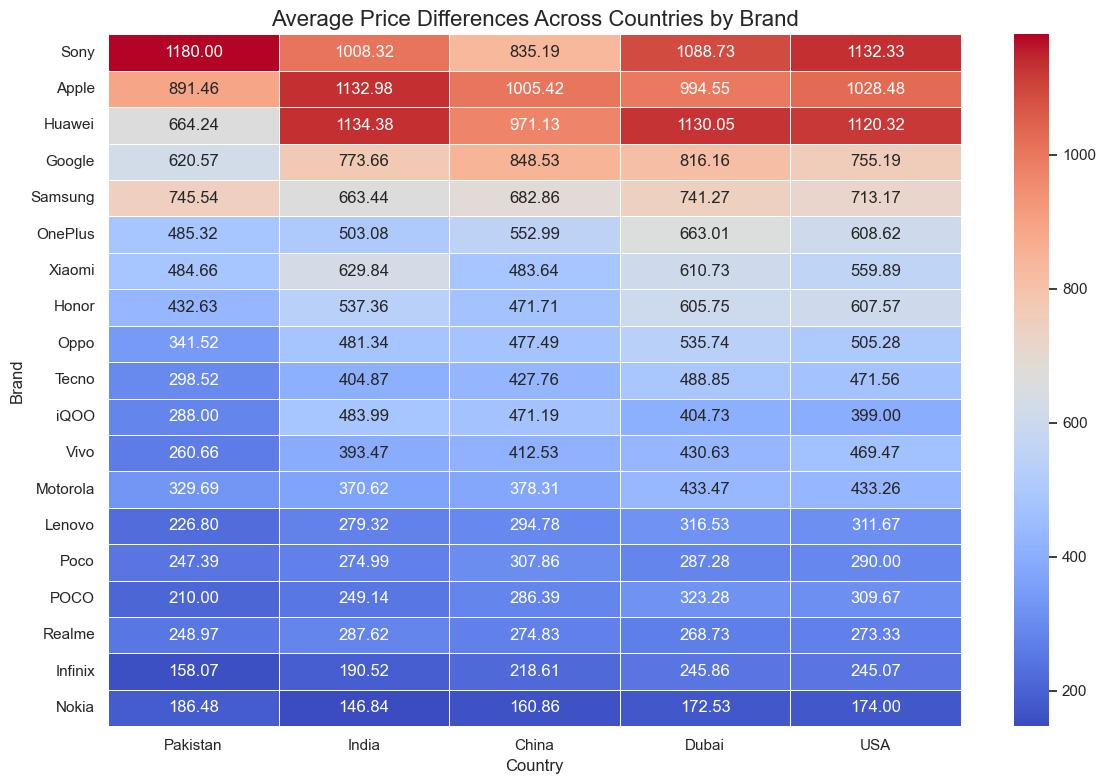

In [ ]:
brand_avg_prices = df.groupby('Company.Name')[price_columns].mean()

brand_avg_prices['average_price'] = brand_avg_prices.mean(axis=1)
brand_avg_prices = brand_avg_prices.sort_values('average_price', ascending=False)

brand_avg_prices = brand_avg_prices.drop(columns=['average_price'])
brand_avg_prices.columns = ['Pakistan', 'India', 'China', 'Dubai', 'USA']

plt.figure(figsize=(12, 8))

sns.heatmap(brand_avg_prices, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Average Price Differences Across Countries by Brand", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Brand", fontsize=12)

plt.tight_layout()
plt.show()


Well the above-mentioned heatmap gives a guid into regions giving better prices based on the Company. \
Surprisingly, Apple is cheaper in Pakistan than Dubai :)

## Part 2:  Visualization

### Question 1

Plot a bar chart for average price per region in USD.

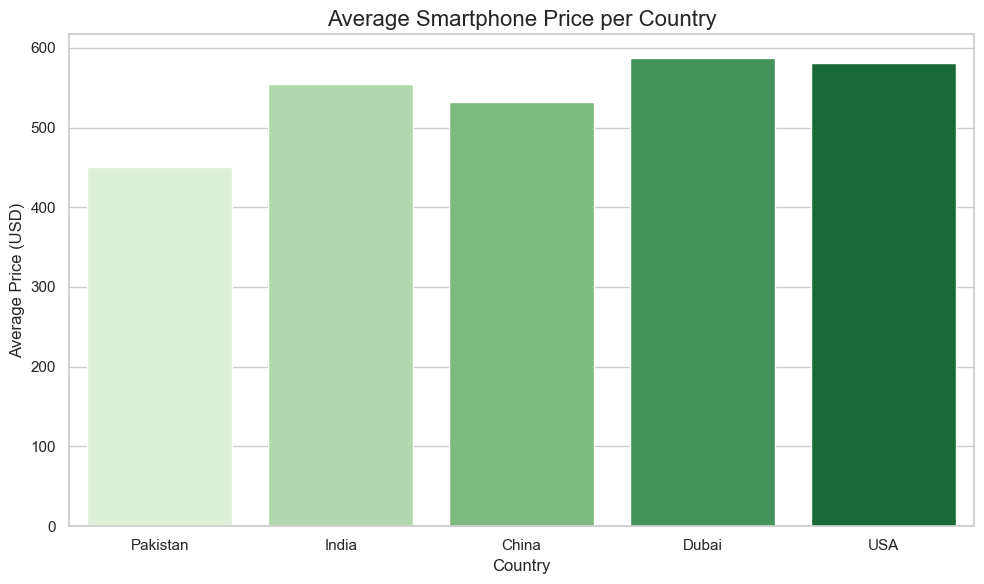

In [215]:
# Calculate the average price for each region
avg_price_per_country = df[price_columns].mean()

# Plot the bar chart for average prices per region
plt.figure(figsize=(10, 6))

sns.barplot(x=['Pakistan', 'India', 'China', 'Dubai', 'USA'], y=avg_price_per_country.values, palette="Greens")

plt.title("Average Smartphone Price per Country", fontsize=16)

plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)

plt.tight_layout()
plt.show()

### Question 2

Create a pie chart of the market share of smartphone brands

In [222]:
# NEVER USE PIE CHARTS

## Part 4: Personal findings

Using either R or Python, explain what else affects the prices of mobile phones. Summarize your 
findings.

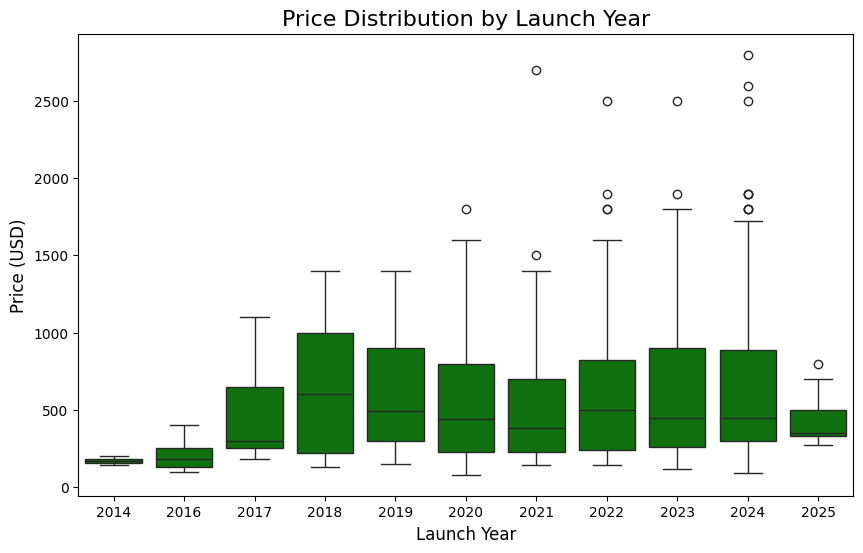

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Launched.Year', y='Launched.Price.USA.USD', color='green')

plt.title('Price Distribution by Launch Year', fontsize=16)
plt.xlabel('Launch Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

plt.show()


<Figure size 1600x800 with 0 Axes>

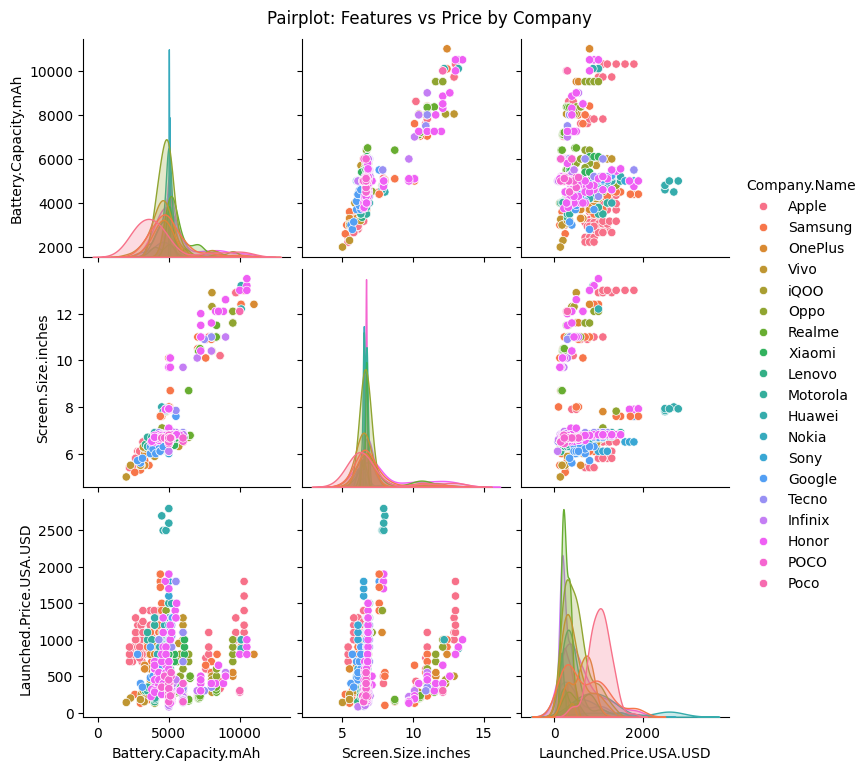

In [41]:
plt.figure(figsize=(16, 8))

sns.pairplot(df[['Company.Name', 'RAM', 'Battery.Capacity.mAh', 'Screen.Size.inches', 'Launched.Price.USA.USD']], hue='Company.Name')

plt.suptitle('Pairplot: Features vs Price by Company', y=1.02)
plt.show()

Seems like the release year does not influence the price that much.
Also seems like the screen size and battery capacity are positively correlated which is logical, however screen size does not influence the price that much either